<a href="https://colab.research.google.com/github/Maansi-1590/TAXI-FARE-PREDICTION-PROJECT/blob/main/Taxi_fare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()  # Choose the file from your system when prompted

import pandas as pd
df = pd.read_csv('taxi_fare.csv')
df.head()

Saving taxi_fare.csv to taxi_fare.csv


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [ ]:
# Check for missing values
df.isnull().sum()

# Check for duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
# Drop duplicates if any
df = df.drop_duplicates()

# Optional: Drop rows with missing critical fields (like coordinates or fare)
df = df.dropna(subset=['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'fare_amount'])

# Reset index after drops
df.reset_index(drop=True, inplace=True)

In [ ]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Earth radius in km
    return c * r

df['trip_distance'] = df.apply(lambda row: haversine(row['pickup_longitude'], row['pickup_latitude'],
                                                     row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

In [ ]:
df['pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_day'] = df['pickup_datetime'].dt.dayofweek
df['is_weekend'] = df['pickup_day'].apply(lambda x: 1 if x >= 5 else 0)
df['am_pm'] = df['pickup_hour'].apply(lambda x: 'am' if x < 12 else 'pm')
df['is_night'] = df['pickup_hour'].apply(lambda x: 1 if (x <= 5 or x >= 22) else 0)


Text(0.5, 1.0, 'Trip Count by Hour')

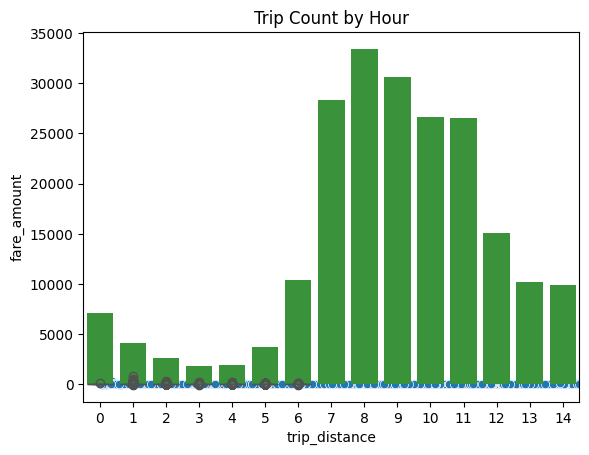

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fare vs Distance
sns.scatterplot(x='trip_distance', y='fare_amount', data=df)
plt.title("Fare vs Distance")

# Fare vs Passenger Count
sns.boxplot(x='passenger_count', y='fare_amount', data=df)
plt.title("Fare vs Passenger Count")

# Trip counts by pickup hour
sns.countplot(x='pickup_hour', data=df)
plt.title("Trip Count by Hour")


In [ ]:
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['fare_amount'] >= Q1 - 1.5 * IQR) & (df['fare_amount'] <= Q3 + 1.5 * IQR)]

In [ ]:
df = pd.get_dummies(df, columns=['am_pm'], drop_first=True)

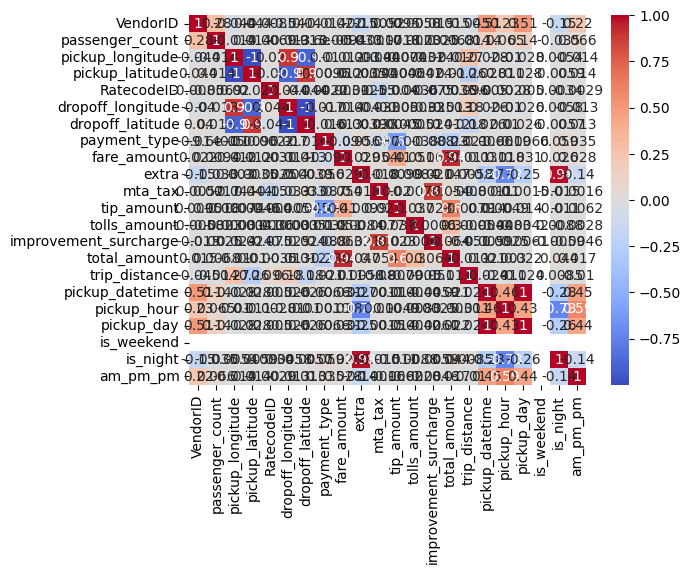

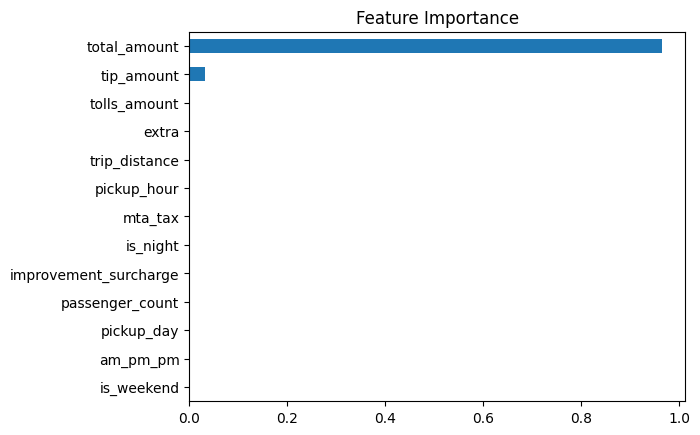

In [ ]:
# Correlation
# Drop non-numeric columns before calculating correlation
numeric_df = df.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag'], axis=1, errors='ignore')
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

# Optional: Feature importance using RandomForest
from sklearn.ensemble import RandomForestRegressor

# Ensure X only contains numeric features
X = numeric_df[['trip_distance', 'pickup_hour', 'pickup_day', 'is_weekend', 'is_night', 'passenger_count', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'am_pm_pm']].drop('fare_amount', axis=1, errors='ignore')
y = numeric_df['fare_amount']

model = RandomForestRegressor()
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.title("Feature Importance")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RF': RandomForestRegressor(),
    'GB': GradientBoostingRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"🔹 {name}")
    print("R2:", r2_score(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("-"*30)
# 8. Hyperparameter Tuning

🔹 Linear
R2: 0.9999993564747134
MSE: 1.6417129121150098e-05
RMSE: 0.004051805661819197
MAE: 6.089668726763992e-05
------------------------------
🔹 Ridge
R2: 0.9999993387684691
MSE: 1.6868837399695605e-05
RMSE: 0.0041071690249727495
MAE: 0.00011995635900262083
------------------------------
🔹 Lasso
R2: 0.926030671540755
MSE: 1.8870494161490279
RMSE: 1.3736991723623582
MAE: 0.8164815519654092
------------------------------
🔹 RF
R2: 0.9995060892445271
MSE: 0.012600276657350189
RMSE: 0.11225095392623703
MAE: 0.0057940665145260134
------------------------------
🔹 GB
R2: 0.9985835120947357
MSE: 0.03613636530557299
RMSE: 0.19009567408432257
MAE: 0.12118717177390459
------------------------------


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None]
}

grid = GridSearchCV(RandomForestRegressor(), param_grid=params, cv=3)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)

Best Params: {'max_depth': None, 'n_estimators': 100}


In [ ]:
import joblib
joblib.dump(grid.best_estimator_, 'taxi_fare_model.pkl')


['taxi_fare_model.pkl']

In [ ]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 89.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 111.0 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import joblib
import pandas as pd

model = joblib.load('taxi_fare_model.pkl')

st.title("🚕 Taxi Fare Predictor")

# Input fields for all 13 features expected by the model
distance = st.number_input("Trip Distance (km)", value=0.0)
hour = st.slider("Pickup Hour", 0, 23, value=0)
day = st.slider("Day of Week (0=Monday, 6=Sunday)", 0, 6, value=0)
is_weekend = st.checkbox("Weekend?", value=False)
is_night = st.checkbox("Night Ride? (10 PM - 5 AM)", value=False)
passenger_count = st.number_input("Passenger Count", min_value=1, value=1)
extra = st.number_input("Extra Charges", value=0.0)
mta_tax = st.number_input("MTA Tax", value=0.0)
tip_amount = st.number_input("Tip Amount", value=0.0)
tolls_amount = st.number_input("Tolls Amount", value=0.0)
improvement_surcharge = st.number_input("Improvement Surcharge", value=0.0)
total_amount = st.number_input("Total Amount (excluding fare)", value=0.0) # Note: This might be tricky as total amount includes fare
am_pm_pm = st.checkbox("Is PM (1 if 12 PM or later, 0 otherwise)", value=False)


# Create a DataFrame with the same column order as the training data
input_data = pd.DataFrame([[distance, hour, day, int(is_weekend), int(is_night), passenger_count, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, int(am_pm_pm)]],
                          columns=['trip_distance', 'pickup_hour', 'pickup_day', 'is_weekend', 'is_night', 'passenger_count', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'am_pm_pm'])


if st.button("Predict Fare"):
    fare = model.predict(input_data)[0]
    st.subheader(f"Predicted Fare: ${fare:.2f}")

2025-11-01 05:55:05.152 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-01 05:55:05.433 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-11-01 05:55:05.433 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-01 05:55:05.435 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-01 05:55:05.437 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-01 05:55:05.439 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-01 05:55:05.440 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-01 05:55:05.441 Thread 'MainThread': mi

In [ ]:
%%writefile taxifare.py
import streamlit as st

st.title("Taxi Fare Prediction")


Writing taxifare.py


In [ ]:
%%writefile taxifare.py
import streamlit as st
import numpy as np
import pandas as pd
import joblib
from math import radians, sin, cos, sqrt, atan2
from datetime import datetime

# --------------------------------------------
# Load the trained model
# --------------------------------------------
model = joblib.load('taxi_fare_model.pkl')

# --------------------------------------------
# Helper function: Haversine distance
# --------------------------------------------
def haversine(lon1, lat1, lon2, lat2):
    R = 6371  # Earth radius in km
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

# --------------------------------------------
# Streamlit App
# --------------------------------------------
st.set_page_config(page_title="Taxi Fare Prediction", page_icon="🚕")
st.title("🚕 TripFare: Predicting Urban Taxi Fare")
st.markdown("Choose a prediction mode:")

mode = st.radio("Prediction Mode", ("Geo-based (Pickup/Dropoff)", "Feature-based (13 Features)"))

# --------------------------------------------
# Geo-based input
# --------------------------------------------
if mode == "Geo-based (Pickup/Dropoff)":
    st.subheader("Enter trip coordinates:")
    pickup_lat = st.number_input("Pickup Latitude", value=40.7614327)
    pickup_long = st.number_input("Pickup Longitude", value=-73.9798156)
    dropoff_lat = st.number_input("Dropoff Latitude", value=40.6513111)
    dropoff_long = st.number_input("Dropoff Longitude", value=-73.8803331)
    passenger_count = st.slider("Number of Passengers", 1, 6, 1)
    pickup_date = st.date_input("Pickup Date", datetime.now().date())
    pickup_time = st.time_input("Pickup Time", datetime.now().time())

    # ----------------------------
    # Derived features (INDENTED CORRECTLY)
    # ----------------------------
    pickup_datetime = datetime.combine(pickup_date, pickup_time)
    trip_distance = haversine(pickup_long, pickup_lat, dropoff_long, dropoff_lat)
    pickup_hour = pickup_datetime.hour
    pickup_day = pickup_datetime.weekday()
    is_weekend = 1 if pickup_day >= 5 else 0
    is_night = 1 if pickup_hour >= 22 or pickup_hour <= 5 else 0
    am_pm_pm = 1 if pickup_hour >= 12 else 0

    # ----------------------------
    # Create 13-feature input (missing numeric features set to 0)
    # ----------------------------
    input_data = pd.DataFrame([[
        trip_distance, pickup_hour, pickup_day, is_weekend, is_night,
        passenger_count, 0, 0, 0, 0, 0, 0, am_pm_pm
    ]], columns=[
        'trip_distance', 'pickup_hour', 'pickup_day', 'is_weekend', 'is_night',
        'passenger_count', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
        'improvement_surcharge', 'total_amount', 'am_pm_pm'
    ])

    # ----------------------------
    # Predict fare (INDENTED CORRECTLY)
    # ----------------------------
    if st.button("💰 Predict Fare"):
        try:
            fare = model.predict(input_data)[0]
            st.success(f"Estimated Fare: ${fare:.2f}")
            st.markdown("---")
            st.write("### Trip Summary:")
            st.write(f"📍 Distance: {trip_distance:.2f} km")
            st.write(f"🕒 Pickup Hour: {pickup_hour}")
            st.write(f"🌃 Night Trip: {'Yes' if is_night else 'No'}")
            st.write(f"📅 Weekend: {'Yes' if is_weekend else 'No'}")
        except Exception as e:
            st.error(f"Error predicting fare: {e}")

# --------------------------------------------
# Feature-based input (13 features)
# --------------------------------------------
else:
    st.subheader("Enter trip details:")
    distance = st.number_input("Trip Distance (km)", value=0.0)
    hour = st.slider("Pickup Hour", 0, 23, value=0)
    day = st.slider("Day of Week (0=Monday, 6=Sunday)", 0, 6, value=0)
    is_weekend = st.checkbox("Weekend?", value=False)
    is_night = st.checkbox("Night Ride? (10 PM - 5 AM)", value=False)
    passenger_count = st.number_input("Passenger Count", min_value=1, value=1)
    extra = st.number_input("Extra Charges", value=0.0)
    mta_tax = st.number_input("MTA Tax", value=0.0)
    tip_amount = st.number_input("Tip Amount", value=0.0)
    tolls_amount = st.number_input("Tolls Amount", value=0.0)
    improvement_surcharge = st.number_input("Improvement Surcharge", value=0.0)
    total_amount = st.number_input("Total Amount (excluding fare)", value=0.0)
    am_pm_pm = st.checkbox("Is PM (1 if 12 PM or later, 0 otherwise)", value=False)

    input_data = pd.DataFrame([[
        distance, hour, day, int(is_weekend), int(is_night), passenger_count,
        extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, int(am_pm_pm)
    ]], columns=[
        'trip_distance', 'pickup_hour', 'pickup_day', 'is_weekend', 'is_night',
        'passenger_count', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
        'improvement_surcharge', 'total_amount', 'am_pm_pm'
    ])

    if st.button("💰 Predict Fare"):
        try:
            fare = model.predict(input_data)[0]
            st.success(f"Estimated Fare: ${fare:.2f}")
        except Exception as e:
            st.error(f"Error predicting fare: {e}")


Overwriting taxifare.py


In [ ]:
X_test.columns

Index(['trip_distance', 'pickup_hour', 'pickup_day', 'is_weekend', 'is_night',
       'passenger_count', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'am_pm_pm'],
      dtype='object')

In [ ]:
!pip install -q streamlit
!wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
!chmod +x cloudflared-linux-amd64
import subprocess
subprocess.Popen(["./cloudflared-linux-amd64", "tunnel", "--url", "http://localhost:8501"])
!nohup /content/cloudflared-linux-amd64 tunnel --url http://localhost:8501 &

--2025-11-01 06:55:27--  https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/cloudflare/cloudflared/releases/download/2025.10.1/cloudflared-linux-amd64 [following]
--2025-11-01 06:55:27--  https://github.com/cloudflare/cloudflared/releases/download/2025.10.1/cloudflared-linux-amd64
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/106867604/d78430f2-7684-4130-ab31-f00b6b0d15e8?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-11-01T07%3A55%3A21Z&rscd=attachment%3B+filename%3Dcloudflared-linux-amd64&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-11-01

In [ ]:
!streamlit run /content/taxifare.py &>/content/logs.txt &  # here instead of app.py please rename with your file name

In [ ]:
!grep -o 'https://.*\.trycloudflare.com' nohup.out | head -n 1 | xargs -I {} echo "Your tunnel url {}"

Your tunnel url https://tire-newspapers-prix-hosting.trycloudflare.com
